In [3]:
import re
import string

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


all_text  =  """
    Google and Facebook are strangling the free press to death. Democracy is the loserGoogle an 
    Your 60-second guide to security stuff Google touted today at Next '18
    A Guide to Using Android Without Selling Your Soul to Google
    Review: Lenovo’s Google Smart Display is pretty and intelligent
    Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is
    Android is better than IOS
    In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency
    is a numerical statistic that is intended to reflect
    how important a word is to a document in a collection or corpus.
    It is often used as a weighting factor in searches of information retrieval
    text mining, and user modeling. The tf-idf value increases proportionally
    to the number of times a word appears in the document
    and is offset by the frequency of the word in the corpus
""".split("\n")[1:-1]
# Preprocessing and tokenizing
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [5]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(all_text)

kmeans = KMeans(n_clusters=2).fit(tfidf)

In [6]:
lines_for_predicting = ["tf and idf is awesome!", "some androids is there"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

array([1, 0])

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["There is a pothole here in the middle of the road, it's been here for years.",
             "There is a bunch of trash piling up near the bus stop.",
             "The grass at the park is pretty much all gone the park looks so ugly.",
             "There is a huge pothole in the HOV lane.",
             "These trees are in the way so it's hard to see if cars are coming.",
             "The fence around the baseball feild has been slowly breaking down.",
             "The stop sign in 43rd and road street is upside down.",
             "The trails on mountain X are littered with trash."]

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.9, max_features=None)
X = vectorizer.fit_transform(documents)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["yet another pothole in the road."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["There is too much trash here."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I can't see down the road dumpster in the way."])
prediction = model.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:
 park
 looks
 gone
 ugly
 grass
 pretty
 lane
 huge
 hov
 hard
Cluster 1:
 trash
 stop
 littered
 mountain
 trails
 43rd
 piling
 upside
 street
 bunch
Cluster 2:
 pothole
 years
 middle
 lane
 huge
 hov
 road
 trees
 way
 hard


Prediction
[2]
[1]
[2]


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

description = ["There is a pothole here in the middle of the road, it's been here for years.",
             "There is a bunch of trash piling up near the bus stop.",
             "The grass at the park is pretty much all gone the park looks so ugly.",
             "There is a huge pothole in the HOV lane.",
             "These trees are in the way so it's hard to see if cars are coming.",
             "The fence around the baseball feild has been slowly breaking down.",
             "The stop sign in 43rd and road street is upside down.",
             "The trails on mountain X are littered with trash."]

title = ["Pothole",
         "Bus stop trash",
         "No grass at the park",
         "Huge pothole",
         "Trees in the way",
         "Breaking fence",
         "broken stopsign",
         "Trash on trail"]

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.9, max_features=None)
X = vectorizer.fit_transform(description)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["yet another pothole in the road."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["There is too much trash here."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I can't see down the road dumpster in the way."])
prediction = model.predict(Y)
print(prediction)

X_title = vectorizer.fit_transform(title)
model2 = KMeans(n_clusters=true_k, init='k-means++')
model2.fit(X_title)

print("\nTop terms per cluster:")
order_centroids = model2.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Pothole"])
prediction = model2.predict(Y)
print(prediction)

Y = vectorizer.transform(["Broken sign"])
prediction = model2.predict(Y)
print(prediction)

Y = vectorizer.transform(["Too mush trash"])
prediction = model2.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:
 trash
 park
 hov
 trails
 huge
 lane
 littered
 mountain
 coming
 hard
Cluster 1:
 slowly
 baseball
 breaking
 feild
 fence
 gone
 lane
 huge
 hov
 hard
Cluster 2:
 road
 years
 middle
 pothole
 43rd
 street
 sign
 upside
 stop
 coming


Prediction
[2]
[0]
[2]

Top terms per cluster:
Cluster 0:
 trash
 trail
 stop
 bus
 way
 trees
 stopsign
 pothole
 park
 huge
Cluster 1:
 pothole
 huge
 way
 trees
 trash
 trail
 stopsign
 stop
 park
 grass
Cluster 2:
 way
 trees
 stopsign
 park
 grass
 fence
 broken
 breaking
 trash
 trail


Prediction
[1]
[2]
[0]


In [3]:
title = ["Pothole",
         "Bus stop trash",
         "No grass at the park",
         "Huge pothole",
         "Trees in the way",
         "Breaking fence",
         "broken stopsign",
         "Trash on trail"]
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["Pothole: There is a pothole here in the middle of the road, it's been here for years.",
             "Bus stop trash: There is a bunch of trash piling up near the bus stop.",
             "No grass at the park:  The grass at the park is pretty much all gone the park looks so ugly.",
             "Huge pothole: There is a huge pothole in the HOV lane.",
             "Trees in the way: These trees are in the way so it's hard to see if cars are coming.",
             "Breaking fence: The fence around the baseball feild has been slowly breaking down.",
             "broken stopsign:The stop sign in 43rd and road street is upside down.",
             "Trash on trail: The trails on mountain X are littered with trash."]

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.9, max_features=None)
X = vectorizer.fit_transform(documents)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["yet another pothole in the road."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["There is too much trash here."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I can't see down the road dumpster in the way."])
prediction = model.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:
 trash
 stop
 park
 breaking
 fence
 bus
 grass
 mountain
 trails
 trail
Cluster 1:
 way
 trees
 hard
 cars
 coming
 gone
 littered
 lane
 huge
 hov
Cluster 2:
 pothole
 huge
 years
 middle
 road
 lane
 hov
 broken
 littered
 baseball


Prediction
[2]
[0]
[1]


In [4]:
import pickle 
filename = 'TfIdf_kmeans'
pickle.dump(model, open(filename, 'wb'))

In [26]:
import pandas as pd
df = pd.read_csv('train_test.csv')
df[df['label']=='roads'][:5]

,Unnamed: 0,text,label
2094,0,Good street and sidewalk design improves publ...,roads
2095,1,Summary,roads
2096,2,Track Record,roads
2097,3,Typical End Users,roads
2098,4,Conservation Impact,roads


In [30]:
data[2094]

' Good street and sidewalk design improves public safety, accommodates a variety of users, reduces environmental impacts, and enhances community character. '

In [13]:
df['label'].unique()

array(['environment', 'safety', 'community', 'roads'], dtype=object)

In [12]:
data = []

for i in range(len(df['text'])):
    data.append(df['text'][i])
data[:5]

['Free Natural Parenting Magazine - Positive Parenting - Green Living - Holistic Wellness ',
 '7 Ways to Keep Our Environment Clean and Safe ',
 'With environmental issues like water contamination, pollution, and climate change, it’s natural to look for ways we can reverse the damage to our planet and keep our environment clean. Many of us think we’re too small to make a difference, but when enough of us take action, we’ve seen the positive results we can create. ',
 'Today we’re looking at the steps – big and small – you can take to keep our environment clean and safe. ',
 'Make your voice heard: vote, sign petitions, contact your leaders ']

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.89, max_features=20000)
X = vectorizer.fit_transform(data)
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=20)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [114]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["7 Ways to Keep Our Environment Clean and Safe"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["With environmental issues like water contamination, pollution, and climate change, it’s natural to look for ways we can reverse the damage to our planet and keep our environment clean. Many of us think we’re too small to make a difference, but when enough of us take action, we’ve seen the positive results we can create."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Make your voice heard: vote, sign petitions, contact your leaders "])
prediction = model.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:
 energy
 renewable
 solar
 electricity
 wind
 power
 sources
 generation
 states
 fuels
Cluster 1:
 community
 hazard
 use
 environmental
 used
 section
 design
 curb
 way
 day
Cluster 2:
 safety
 health
 occupational
 hazards
 workplace
 work
 workers
 hazard
 national
 employees
Cluster 3:
 event
 attendees
 local
 ideas
 make
 events
 corporate
 community
 people
 social


Prediction
[1]
[1]
[1]


In [115]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["Good street and sidewalk design improves public safety, accommodates a variety of users, reduces environmental impacts, and enhances community character"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["There is too much trash here. It stinks over here"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I can't see down the road dumpster in the way. this is a safety hazard"])
prediction = model.predict(Y)
print(prediction)
 



Prediction
[1]
[1]
[2]


In [123]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = vectorizer.transform(data)
pca = PCA(n_components=2)
pca.fit(X.toarray())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
x = pca.components_[0]
y = pca.components_[1]

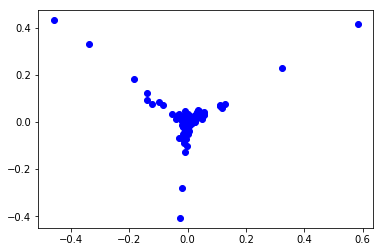

In [118]:
plt.plot(x, y, 'bo')

In [119]:
len(model.cluster_centers_[0])

199

In [124]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=7,
       random_state=42, tol=0.0)

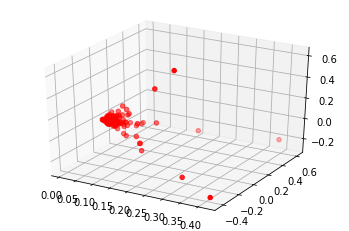

In [128]:
from mpl_toolkits.mplot3d import Axes3D
x = svd.components_[0]
y = svd.components_[1]
z = svd.components_[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
